### Carga y preparación de Datos e-commerce

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Se ignoran los warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
dfe = pd.read_csv("2019-Nov.csv")

In [4]:
dfe.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [5]:
# Se eliminan los duplicados 
df = dfe.dropna()

In [6]:
# Filtrar solo los 3 eventos
df = df[
    (df['event_type'] == 'view') |
    (df['event_type'] == 'cart') |
    (df['event_type'] == 'purchase')
]

In [7]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [8]:
print(df['event_time'].dtype)

datetime64[ns, UTC]


In [9]:
df['day_ofweek'] = df['event_time'].dt.day_name()
df['hour_ofday'] = df['event_time'].dt.hour
df['purchase'] = df['event_type'].isin(['purchase']).astype(int)

In [10]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day_ofweek,hour_ofday,purchase
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,Friday,0,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,Friday,0,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,Friday,0,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,Friday,0,0
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,Friday,0,0


### Analisis y Visualización 

In [12]:
# Tasa de conversión general
tasa = (df['event_type'] == 'purchase').sum() / (df['event_type'] == 'view').sum()
print('Tasa de conversion general:', tasa)

Tasa de conversion general: 0.01676846522515221


In [13]:
# Compras en Horas de Día
hora_compra = df.groupby('hour_ofday')['purchase'].sum()

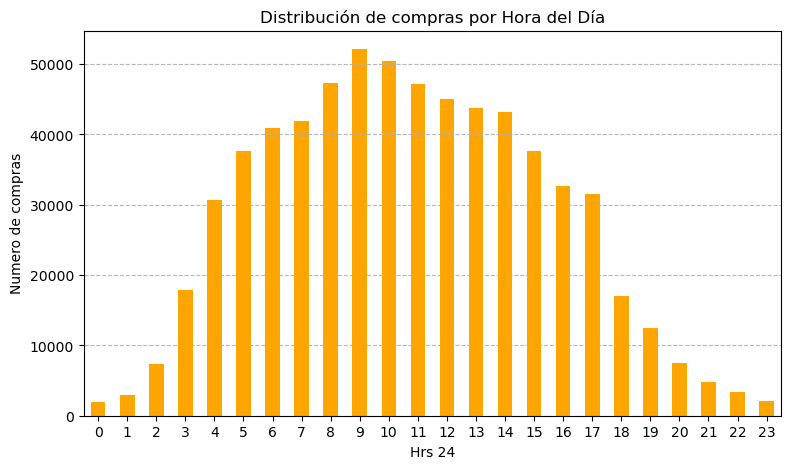

In [14]:
plt.figure(figsize = (9, 5))
hora_compra.plot(kind = 'bar', color = 'orange')
plt.title('Distribución de compras por Hora del Día')
plt.xlabel('Hrs 24')
plt.ylabel('Numero de compras')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha=0.9)
plt.show()

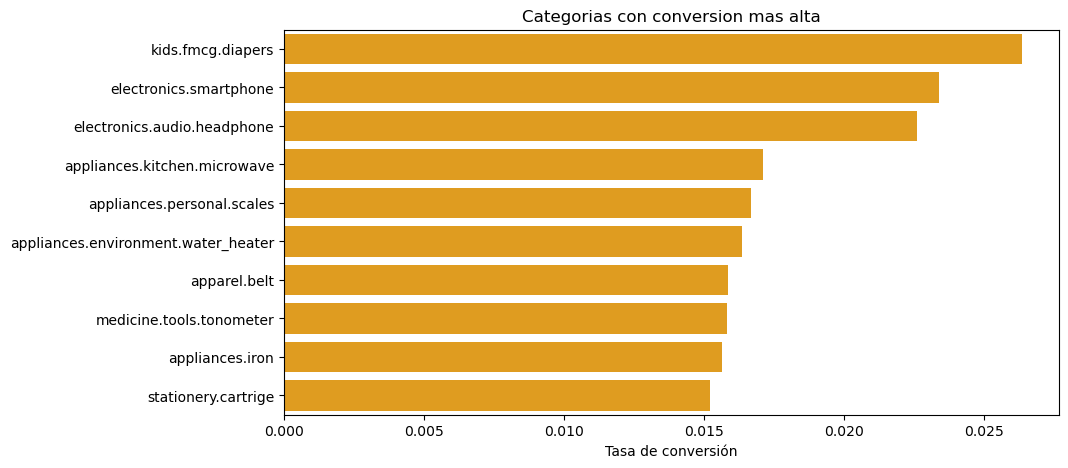

In [15]:
# Tasa de conversión por categorias
views = df.groupby('category_code').size()
purchases = df.groupby('category_code')['purchase'].sum()
tasa = (purchases / views).sort_values(ascending = False)
tasaFilt = tasa.head(10).reset_index()
tasaFilt.columns = ['category_code', 'conversion']

plt.figure(figsize = (10, 5))
sns.barplot(data = tasaFilt, x = 'conversion', y = 'category_code', color = 'orange')
plt.title('Categorias con conversion mas alta')
plt.xlabel('Tasa de conversión')
plt.ylabel('')
plt.show()

In [16]:
# Usuarios que añadieron y no compraron
users_cart = df[df['event_type'] == 'cart']['user_id'].unique()
users_purchase = df[df['event_type'] == 'purchase']['user_id'].unique()

In [17]:
set_cart = set(users_cart)
set_purchase = set(users_purchase)

onlyCart = set_cart - set_purchase
porcent = len(onlyCart) / len(set_cart) * 100

print("Porcentaje de usuarios que añadieron sin compra", porcent,"%")

Porcentaje de usuarios que añadieron sin compra 51.30261908211394 %


In [18]:
# Categorias con mas abandono de carrito
df_cart = df[df['event_type'] == 'cart'][['product_id', 'category_code']].drop_duplicates()
df_purchase = df[df['event_type'] == 'purchase'][['product_id']].drop_duplicates()


In [19]:
product_cart = df_cart[~df_cart['product_id'].isin(df_purchase['product_id'])]
count_category = product_cart['category_code'].value_counts().sort_values(ascending=False)
count_category = count_category.head(15)


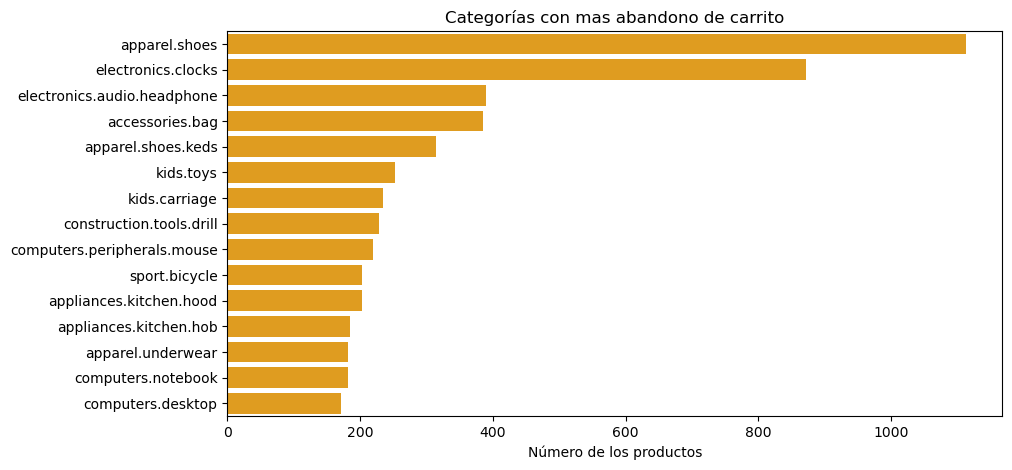

In [20]:
plt.figure(figsize = (10, 5))
sns.barplot(x = count_category.values, y = count_category.index, color = "orange")
plt.title("Categorías con mas abandono de carrito")
plt.xlabel("Número de los productos")
plt.ylabel("")
plt.show()